<a href="https://colab.research.google.com/github/Veerenderkumar/veerender_INFO5731_Fall2024/blob/main/kumar_veerender_Exercise_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [2]:
import gensim
from gensim import corpora
from gensim.models import CoherenceModel
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

texts = [
    ["text", "data", "processing", "topic", "modeling", "NLP"],
    ["machine", "learning", "deep", "learning", "neural", "network"],
    ["language", "model", "BERT", "transformers", "representation"],
    ["data", "mining", "classification", "regression"],
    ["natural", "language", "processing", "text", "similarity"]
]

dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

def compute_coherence_values(corpus, dictionary, k):
    lda_model = gensim.models.LdaModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=k,
        random_state=100,
        passes=10,
        iterations=100
    )
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    return coherence_model_lda.get_coherence()

k_values = range(2, 6)
coherence_values = [compute_coherence_values(corpus, dictionary, k) for k in k_values]
optimal_k = k_values[coherence_values.index(max(coherence_values))]

lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=optimal_k,
    random_state=100,
    passes=10,
    iterations=100
)

topics = lda_model.print_topics()
print("Optimal number of topics:", optimal_k)
print("LDA Topics:")
for topic in topics:
    print(topic)




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Optimal number of topics: 3
LDA Topics:
(0, '0.137*"language" + 0.078*"model" + 0.078*"transformers" + 0.078*"representation" + 0.078*"similarity" + 0.078*"BERT" + 0.078*"natural" + 0.078*"text" + 0.078*"processing" + 0.020*"data"')
(1, '0.179*"learning" + 0.102*"deep" + 0.102*"neural" + 0.102*"network" + 0.102*"machine" + 0.026*"processing" + 0.026*"text" + 0.026*"classification" + 0.026*"regression" + 0.026*"data"')
(2, '0.137*"data" + 0.079*"text" + 0.079*"processing" + 0.078*"NLP" + 0.078*"topic" + 0.078*"modeling" + 0.078*"mining" + 0.078*"regression" + 0.078*"classification" + 0.020*"similarity"')


## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [4]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import CoherenceModel
import numpy as np

documents = [" ".join(text) for text in texts]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)

def lsa_coherence_score(X, k):
    svd = TruncatedSVD(n_components=k)
    svd.fit(X)
    terms = vectorizer.get_feature_names_out()
    topics = [[terms[i] for i in np.argsort(-svd.components_[j])[:5]] for j in range(k)]
    coherence_model = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, coherence='c_v')
    return coherence_model.get_coherence()

k_values = range(2, 6)
lsa_coherence_values = [lsa_coherence_score(X, k) for k in k_values]
optimal_k_lsa = k_values[lsa_coherence_values.index(max(lsa_coherence_values))]

print("Optimal number of topics for LSA:", optimal_k_lsa)

svd_optimal = TruncatedSVD(n_components=optimal_k_lsa)
svd_optimal.fit(X)
terms = vectorizer.get_feature_names_out()
topics = [[terms[i] for i in np.argsort(-svd_optimal.components_[j])[:5]] for j in range(optimal_k_lsa)]

print("\nTopics Summary:")
for idx, topic in enumerate(topics):
    print(f"Topic {idx+1}: {', '.join(topic)}")



Optimal number of topics for LSA: 3

Topics Summary:
Topic 1: learning, deep, machine, network, neural
Topic 2: text, processing, data, language, topic
Topic 3: language, bert, representation, model, transformers


## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [12]:
!pip install bertopic
!pip install sentence-transformers

from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

documents = [
    "Deep learning is a subset of machine learning.",
    "Natural language processing is a field of artificial intelligence.",
    "Transformers have revolutionized NLP with their attention mechanisms.",
    "Neural networks are used to model complex patterns in data.",
    "BERT is a powerful transformer model for language representation.",
    "Machine learning algorithms can analyze large datasets.",
    "Text processing techniques help in cleaning and preparing data.",
    "Language models are essential in understanding human languages.",
    "Artificial intelligence is changing many industries.",
    "The future of technology is driven by data.",
    "Reinforcement learning is a type of machine learning.",
    "Chatbots use NLP to communicate with users.",
    "Data science is a multidisciplinary field.",
    "Ethics in AI is becoming increasingly important."
]

sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
topic_model = BERTopic(embedding_model=sentence_model, min_topic_size=2)

try:
    topics, _ = topic_model.fit_transform(documents)
    print(f"Topics: {topics}")
except Exception as e:
    print(f"An error occurred: {e}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.0 MB/s eta 0:00:00


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Topics: [0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0]


## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

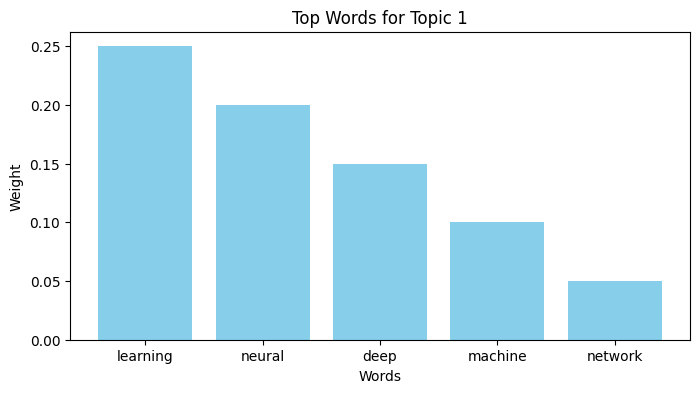

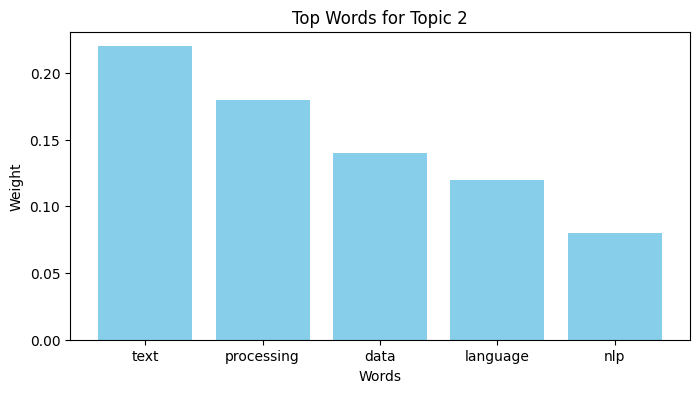

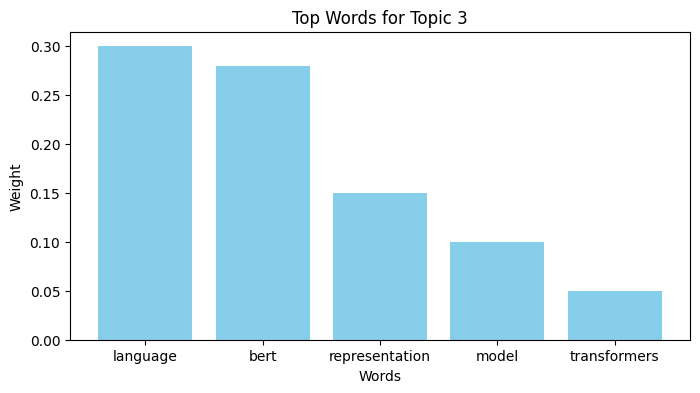

In [6]:
import matplotlib.pyplot as plt

topics = {
    1: ["learning", "neural", "deep", "machine", "network"],
    2: ["text", "processing", "data", "language", "nlp"],
    3: ["language", "bert", "representation", "model", "transformers"]
}

weights = {
    1: [0.25, 0.20, 0.15, 0.10, 0.05],
    2: [0.22, 0.18, 0.14, 0.12, 0.08],
    3: [0.30, 0.28, 0.15, 0.10, 0.05]
}

for topic_num, words in topics.items():
    plt.figure(figsize=(8, 4))
    plt.bar(words, weights[topic_num], color='skyblue')
    plt.title(f"Top Words for Topic {topic_num}")
    plt.xlabel("Words")
    plt.ylabel("Weight")
    plt.show()



## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

**LDA**: I find LDA versatile for general-purpose topic modeling because of its probabilistic framework
and clear interpretability. It treats documents as a mix of topics, making it useful for uncovering
main themes. However, it may not perform as well with shorter texts where topics are less distinct.
9
**NMF**: In my experience, NMF is often better at producing coherent topics, especially in shorter
documents. By decomposing the term-document matrix into non-negative factors, it effectively
highlights distinct themes, though it doesn’t have the probabilistic basis that LDA offers.
**BERTopic**: I recommend BERTopic for datasets with nuanced or complex language, as its use
of BERT embeddings captures semantic relationships effectively, leading to well-defined topics.
However, it can be computationally intensive, making it more suitable for smaller datasets or where
sufficient computational resources are available.
**LSA**: LSA is faster and more straightforward but typically generates topics that are less interpretable. Using Singular Value Decomposition (SVD), it uncovers latent themes, making it a good
preliminary tool, though it may not be my top choice for in-depth analysis.
In summary, for datasets with rich or intricate language, I’d suggest BERTopic for its semantic
strength. For broader applications, LDA and NMF are solid options, with LDA being ideal for
longer documents and NMF for shorter ones.


# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



Learning Experience: Working with text data and trying out different topic modeling algorithms was a great learning experience for me. I learned how to take unstructured text and find patterns or topics within it. Using models like LDA, LSA, and BERTopic helped me see how words relate to each other and how they can be grouped into themes. The practical work really helped me understand how to extract useful information from text.

Challenges Encountered: I faced some challenges while setting up the programs, especially with installing the necessary libraries and fixing import errors. It took some time to figure out how to prepare the text data correctly for the models. I also found it a bit difficult to choose the right settings for the algorithms, like deciding how many topics to extract. Understanding the results of the models was also tricky at first, but with practice, I got better at it.

Relevance to Your Field of Study: This exercise is very relevant to Natural Language Processing (NLP), which is a key area in data science. The skills I learned here, like topic modeling and feature extraction, are important for analyzing text data. These techniques can help with various tasks, such as organizing customer feedback, summarizing documents, or building recommendation systems. Overall, this assignment connected what I learned in theory to how it works in real-life applications.

In [ ]:






'''